In [ ]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load Dataset
df = pd.read_csv('/content/Transaksiperbankan.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [ ]:
# Print Informasi Dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

Terdapat 16 kolom dan 2512 data entri dari hasil info dataset

1. TransactionID : ID transaksi
2. AccountID : ID account
3. TransactionAmount : Jumlah transaksi
4. TransactionDate : Tanggal transaksi
5. TransactionType : Tipe transaksi ('Debit' & 'Credit')
6. Location : Lokasi transaksi
7. DeviceID : ID device transaksi
8. IP Address : Alamat IP transaksi
9. MerchantID : Merchant ID transaksi
10. Channel : Platform transaksi (Online, ATM, Branch, dll)
11. CustomerAge : Umur customer
12. CustomerOccupation : Pekerjaan customer
13. TransactionDuration : Durasi Transaksi
14. LoginAttempts : Jumlah percobaan login
15. AccountBalance : Saldo akun
16. PreviousTransactionDate : Tanggal transaksi sebelumnya

In [ ]:
# Memisahkan variabel numeric & categorical
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_columns)
print("Categorical columns", non_numerical_columns)

Numerical columns: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Categorical columns ['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']


In [ ]:
# Deskripsi Statistik
stat = df.describe()
style_stat = stat.style.background_gradient(cmap = 'YlOrBr')
display(style_stat)

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


* TransactionAmount
  Nilai rata-rata transaction amount adalah 297.59 (sekitar 300). Dengan nilai Min 0.26 dan nilai Max 1919.11. Transaction amount memiliki nilai rata-rata lebih besar dari median, yang artinya distribusi transaksi memiliki kemiringan positif (transaksi kecil lebih banyak dari pada transaksi besar)

* CustomerAge
  Nilai rata-rata umur customer adalah 44.67 tahun (sekitar 45). Dengan nilai Min 18 tahun dan nilai Max 80 tahun. customer memiliki rentang usia yang luas

* TransactionDuration
  Nilai rata-rata durasi transaksi adalah 119.64 detik (sekitar 2 menit). Dengan nilai Min 10 detik dan nilai Max 300 detik (5 menit). Durasi transaksi yang lama bisa diindikasikan karena rumit atau mencurigakan

* LoginAttemps
  Nilai rata-rata login adalah 1.12 kali. Dengan nilai Min 1 kali dan nilai Max 5 kali. Setiap transaksi melibatkan setidaknya 1x transaksi. Percobaan login sebanyak 5x bisa jadi tanda potensi aktivitas mencurigakan, lebih besar dari itu dapat dikaitkan dengan transaksi penipuan

* AccountBalance
  Nilai rata-rata saldo adalah 5114.30. Dengan nilai Min 101.25 dan nilai Max 14977.99. Rekening dengan saldo rendah mungkin memiliki perilaku transaksi yang beda dibandingkan dengan saldo tinggi

In [ ]:
# Deskripsi variabel yang tipe datanya object
display(df.describe(include='object'))

,TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,PreviousTransactionDate
count,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512
unique,2512,495,2512,2,43,681,592,100,3,4,360
top,TX002496,AC00460,2023-04-03 16:07:53,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,Student,2024-11-04 08:09:17
freq,1,12,1,1944,70,9,13,45,868,657,16


In [ ]:
# Cek missing & duplicate value
print(f'Missing Values : {df.isna().sum().sum()}')
print(f'Duplicate Values : {df.duplicated().sum()}')

Missing Values : 0
Duplicate Values : 0


Tidak ada missing values dan duplikasi data di dalam datasetnya

In [ ]:
# Jumlah nilai unik semua kolom
print(df.nunique())

TransactionID              2512
AccountID                   495
TransactionAmount          2455
TransactionDate            2512
TransactionType               2
Location                     43
DeviceID                    681
IP Address                  592
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2510
PreviousTransactionDate     360
dtype: int64


# Bagaimana distribusi jumlah transaksinya (Transaction Amount)

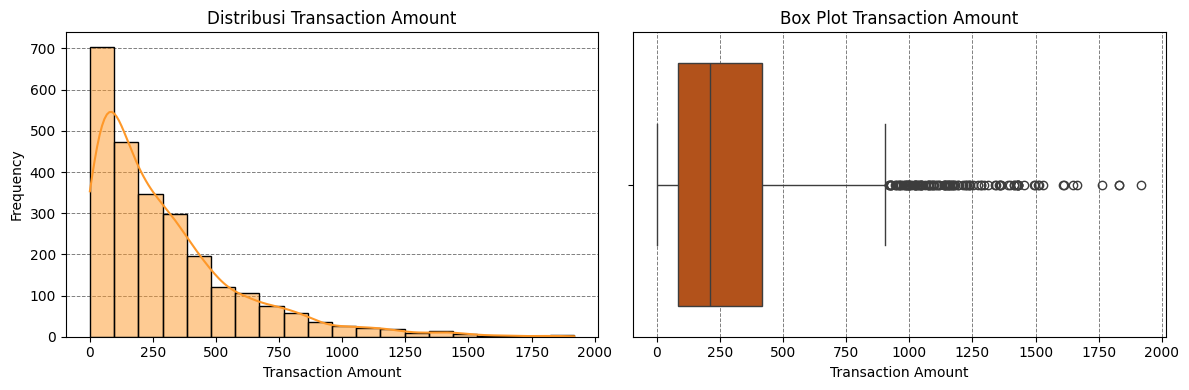

In [ ]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1,2, figsize=(12,4))

sns.histplot(df['TransactionAmount'], bins=20, kde=True, color=custom_palette[1], ax=axes[0])
axes[0].set_title('Distribusi Transaction Amount')
axes[0].set_xlabel('Transaction Amount')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['TransactionAmount'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot Transaction Amount')
axes[1].set_xlabel('Transaction Amount')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

* Histogram menunjukkan transaksi memiliki kemiringan positif/condong ke kanan, yang artinya transaksi kecil lebih banyak dari pada transaksi besar. Hal ini adalah pola umum data keuangan dimana mayoritas transaksi kecil lebih banyak

* Box plot menunjukkan adanya outlier, titik panjang di kanan kotak diagram mengidikasi adanya nilai yang jauh lebih tinggi dari pada mayoritas data. Outlier dapat mewakili transaksi yang tidak biasa/potensi penipuan


# Bagaimana sebaran nasabah berdasarkan usia (Customer Age)

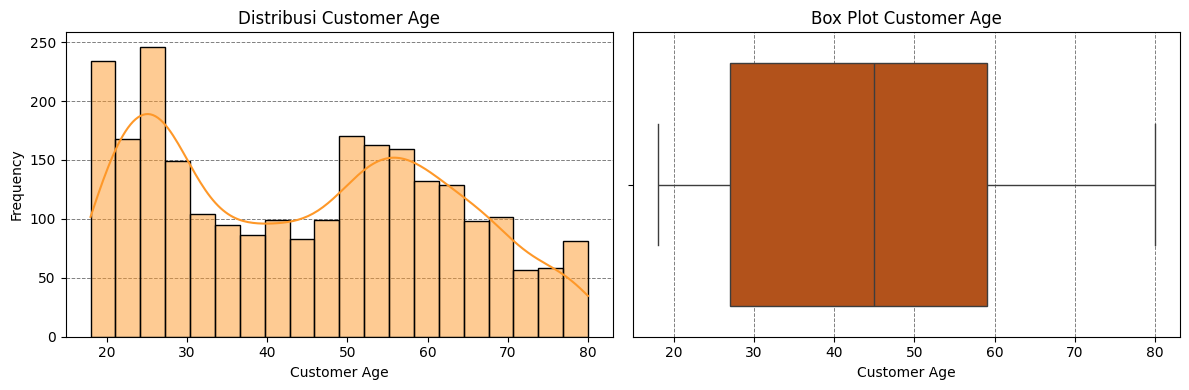

In [ ]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1,2, figsize=(12,4))

sns.histplot(df['CustomerAge'], bins=20, kde=True, color=custom_palette[1], ax=axes[0])
axes[0].set_title('Distribusi Customer Age')
axes[0].set_xlabel('Customer Age')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['CustomerAge'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot Customer Age')
axes[1].set_xlabel('Customer Age')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

* Histogram menunjukkan distribusi usia pelanggan yang hampir simetris, walaupun ada sedikit puncak di sekitar usia 20 - 30 an. hal ini menunjukkan  distribusi usia relatif rata di berbagai kelompok usia

* Box plot menunjukkan tidak adanya outlier. whiskers meluas ke nilai min dan max dalan rentang yang wajar, menunjukkan distribusi usia relatif seimbang

# Bagaimana distribusi durasi transaksinya (Transaction Duration)

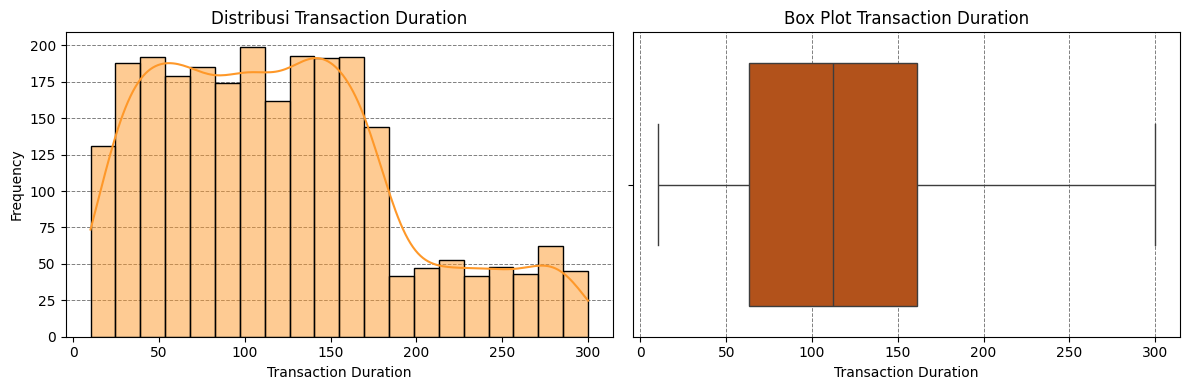

In [ ]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1,2, figsize=(12,4))

sns.histplot(df['TransactionDuration'], bins=20, kde=True, color=custom_palette[1], ax=axes[0])
axes[0].set_title('Distribusi Transaction Duration')
axes[0].set_xlabel('Transaction Duration')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['TransactionDuration'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot Transaction Duration')
axes[1].set_xlabel('Transaction Duration')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

* Histogram menunjukkan distribusi durasi transaksi hampir simetris, dengan sedikit puncak di kisaran tengah. ini menunjukkan bahwa sebagian besar transaksi perlu waktu yang cukup lama

* Box plot menunjukkan tidak adanya outlier. whiskers meluas ke nilai min dan max dalan rentang yang wajar, menunjukkan distribusi relatif seimbang

# Bagaimana distribusi upaya loginnya (Login Attempts)

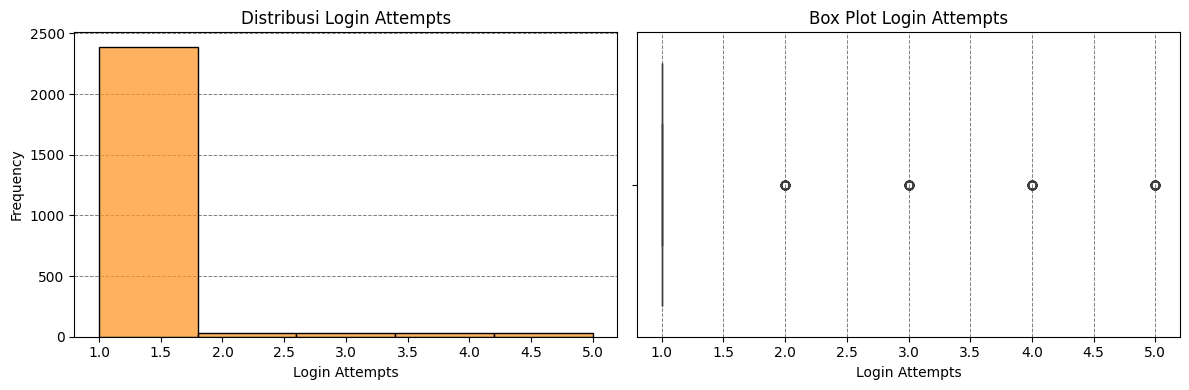

In [ ]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1,2, figsize=(12,4))

sns.histplot(df['LoginAttempts'], bins=5, kde=False, color=custom_palette[1], ax=axes[0])
axes[0].set_title('Distribusi Login Attempts')
axes[0].set_xlabel('Login Attempts')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['LoginAttempts'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot Login Attempts')
axes[1].set_xlabel('Login Attempts')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

* Histogram menunjukkan bahwa distribusi upaya login sangat condong ke angka 1. Artinya sebagian besar transaksi hanya satu upaya login

* Box plot menunjukkan ada beberapa outlier dengan jumlah percobaan login yang lebih tinggi. outlier dapat mewakili kasus beberapa percobaan login yang gagal, yang mungkin perlu penyelidikan lebih lanjut

# Bagaimana distribusi saldo rekeningnya (Account Balance)

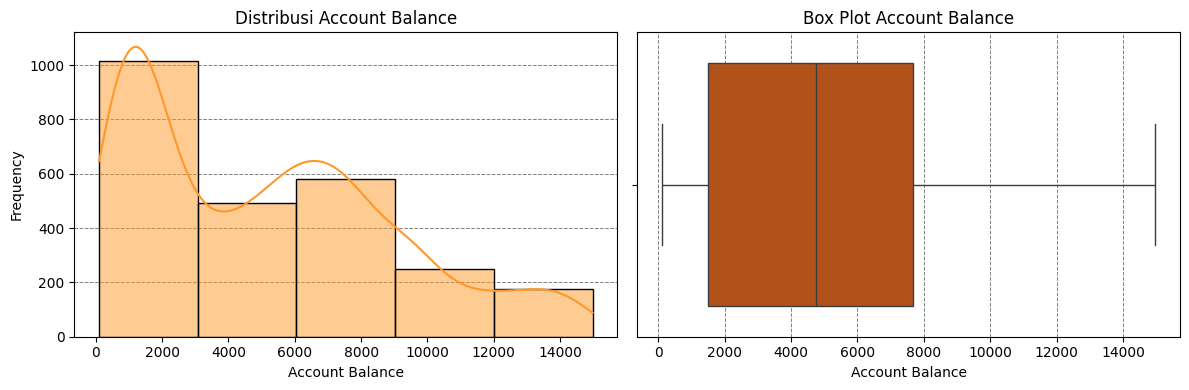

In [ ]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1,2, figsize=(12,4))

sns.histplot(df['AccountBalance'], bins=5, kde=True, color=custom_palette[1], ax=axes[0])
axes[0].set_title('Distribusi Account Balance')
axes[0].set_xlabel('Account Balance')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['AccountBalance'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot Account Balance')
axes[1].set_xlabel('Account Balance')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

* Histogram menunjukkan distribusi positif/condong ke kanan, hal itu menunjukkan mayoritas akun memiliki saldo lebih rendah dan sebagian kecil memiliki saldo yang lebih tinggi

*

# Correlation matrix kolom numeric

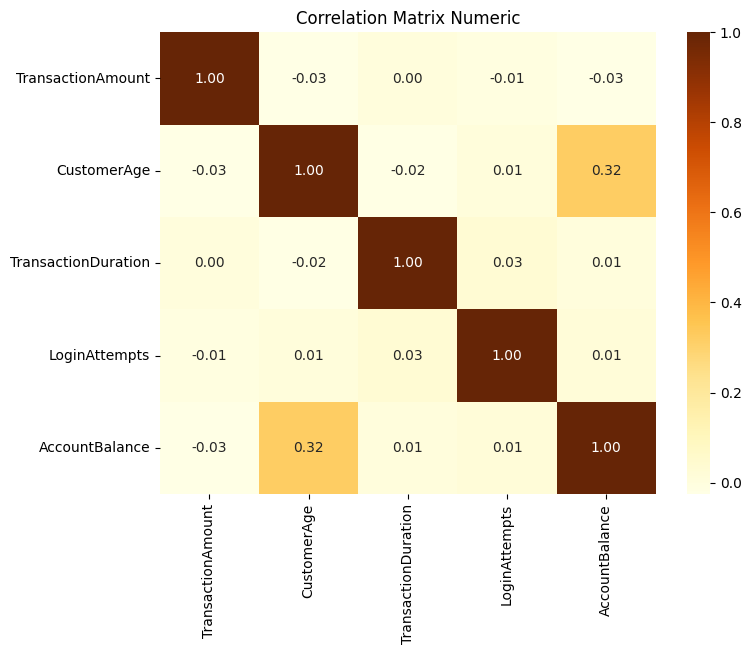

In [ ]:
cmap = "YlOrBr"
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f")
plt.title('Correlation Matrix Numeric')
plt.show()

# Berapa jumlah transaksinya berdasarkan tipe transaksinya

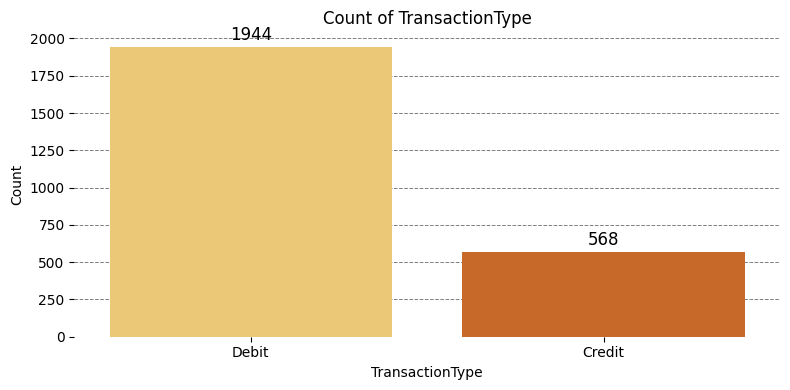

In [ ]:
def plot_categorical_distribution(df, feature, palette="YlOrBr"):
    num_categories = len(df[feature].unique())

    custom_palette = sns.color_palette(palette, num_categories)
    fig, axes = plt.subplots(1, 1, figsize=(8, 4))

    sns.countplot(x=feature, data=df, ax=axes, palette=custom_palette)

    axes.set_title(f'Count of {feature}')
    axes.set_xlabel(feature)
    axes.set_ylabel('Count')

    for p in axes.patches:
        axes.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='baseline',
                      color='black', fontsize=12,
                      xytext=(0, 5),
                      textcoords='offset points')

    axes.set_axisbelow(True)
    axes.grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
    sns.despine(left=True, bottom=True)

    plt.tight_layout()
    plt.show()

plot_categorical_distribution(df, 'TransactionType')


* Diagram batang tersebut menunjukkan transaksi Debit sangat signifikan lebih banyak jumlahnya dibandingkan dengan transaksi Kredit

# Berapa jumlah transaksi berdasarkan channelnya


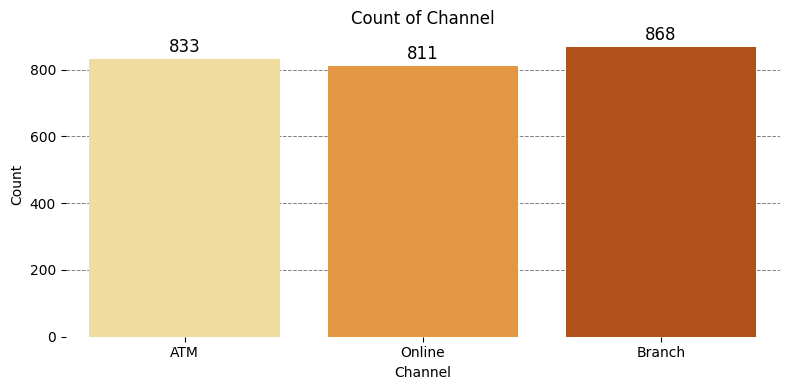

In [ ]:
plot_categorical_distribution(df, 'Channel')

* Diagram batang menunjukkan ketiga channel tersebut memiliki distribusi jumlah transaksi yang relatif sama (rata)

# Berapa jumlah transaksi berdasarkan pekerjaan customer

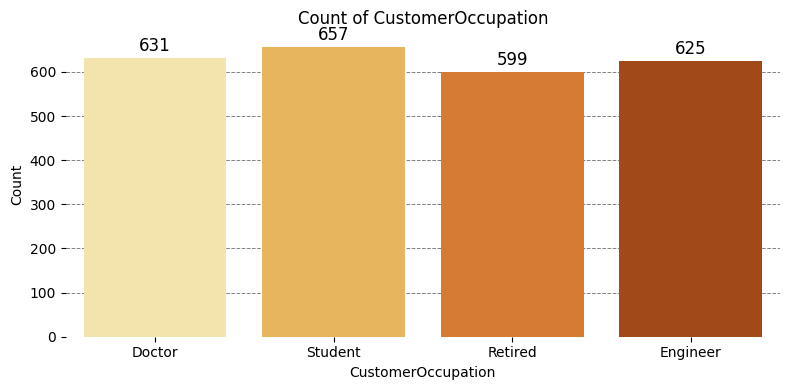

In [ ]:
plot_categorical_distribution(df, 'CustomerOccupation')

* Diagram batang menunjukkan distribusi jumlah transaksi yang relatif rata di ke empat jenis pekerjaan customer

# Top 10 lokasi yang paling banyak melakukan transaksi

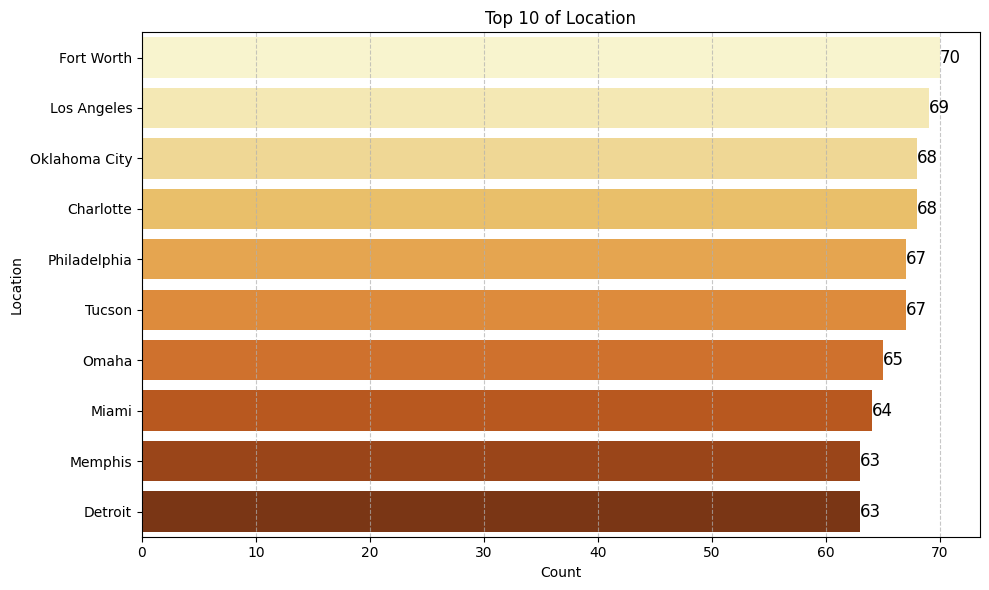

In [ ]:
def plot_top_categories_bar_chart(column_name, data=df, palette='YlOrBr'):
    plt.figure(figsize=(10, 6))

    top_categories = data[column_name].value_counts().nlargest(10)

    sns.barplot(
        x=top_categories.values,
        y=top_categories.index,
        hue=top_categories.index,
        palette=sns.color_palette(palette, len(top_categories)),
        legend=False
    )

    plt.title(f'Top 10 of {column_name}')
    plt.xlabel('Count')
    plt.ylabel(column_name)

    for index, value in enumerate(top_categories.values):
        plt.text(value, index, str(value), va='center', ha='left', fontsize=12)

    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_top_categories_bar_chart('Location')


* diagram batang menunjukkan transaksi yang relatif merata di top 10 lokasi tersebut. Dan Fort Worth lokasi yang memilik transaksi paling tinggi di antara lainnya

# Top 10 merchant yang paling banyak melakukan transaksi

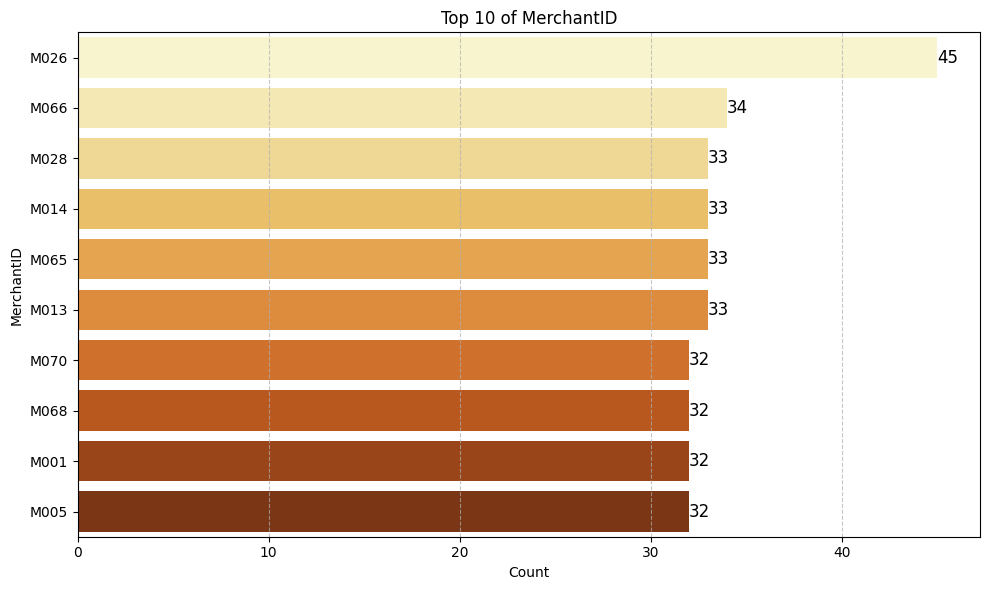

In [ ]:
plot_top_categories_bar_chart('MerchantID')

* Diagram batang menunjukkan merchant M026 memiliki transaksi yang lebih besar dibandingan merchant lainnya. Merchant lainnya memiliki nilai yang relatif rata

# Bagaimana distribusi perubahan saldo besar dari keseluruhan dataset

Balance changes: 125


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,13382.67
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37,Doctor,139,1,13316.71,2024-11-04 08:10:09,13323.79
34,TX000035,AC00365,255.26,2023-10-27 16:42:49,Credit,San Francisco,D000357,92.214.76.157,M002,Branch,45,Doctor,50,1,14815.87,2024-11-04 08:10:51,15071.13
41,TX000042,AC00480,34.02,2023-01-09 16:13:21,Debit,Philadelphia,D000627,109.105.179.186,M046,Online,38,Doctor,19,1,14214.48,2024-11-04 08:11:45,14180.46
42,TX000043,AC00120,241.42,2023-04-20 18:57:43,Credit,Charlotte,D000198,60.89.202.192,M044,Online,57,Doctor,116,1,13357.02,2024-11-04 08:09:03,13598.44


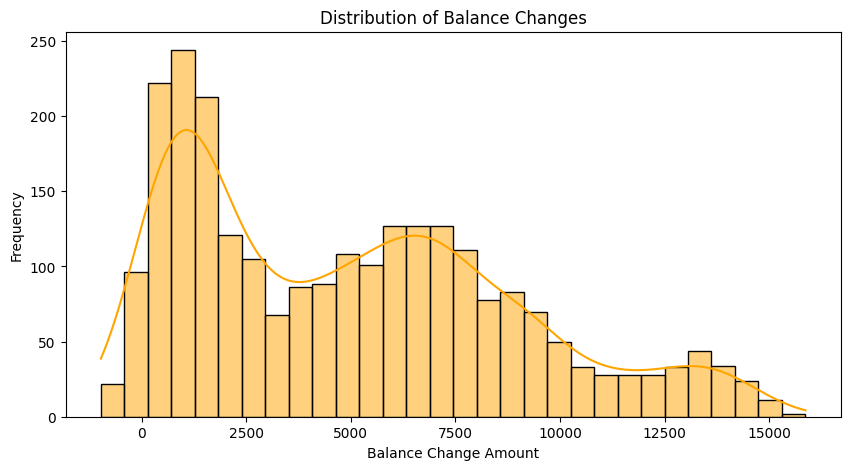

In [ ]:
df['BalanceChange'] = df.apply(
    lambda row: row['AccountBalance'] - row['TransactionAmount'] if row['TransactionType'] == 'Debit'
    else row['AccountBalance'] + row['TransactionAmount'],
    axis=1
)

balance_change_threshold = df['BalanceChange'].mean() + 2 * df['BalanceChange'].std()
large_balance_changes = df[df['BalanceChange'].abs() > balance_change_threshold]
print(f"Balance changes: {len(large_balance_changes)}")
display(large_balance_changes.head())

plt.figure(figsize=(10, 5))
sns.histplot(df['BalanceChange'], bins=30, kde=True, color = "orange")
plt.title('Distribution of Balance Changes')
plt.xlabel('Balance Change Amount')
plt.ylabel('Frequency')
plt.show()

# Berapa jumlah transaksi kredit dibandingkan dengan debit terkait dengan perubahan saldo besar

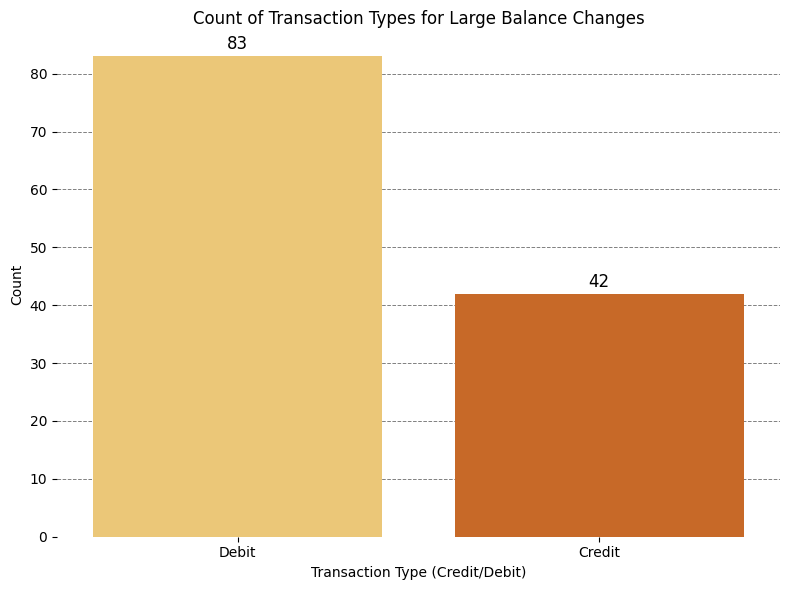

In [ ]:
transaction_type_counts = large_balance_changes['TransactionType'].value_counts()
transaction_type_percentages = large_balance_changes['TransactionType'].value_counts(normalize=True) * 100

custom_palette = sns.color_palette("YlOrBr", 2)
fig, axes = plt.subplots(1, 1, figsize=(8, 6))  # Cukup 1 grafik kalau pie chart-nya sudah dihapus

sns.countplot(x='TransactionType', data=large_balance_changes, ax=axes, palette=custom_palette, hue=None)  # Tambahkan hue=None
axes.set_title('Count of Transaction Types for Large Balance Changes')
axes.set_xlabel('Transaction Type (Credit/Debit)')
axes.set_ylabel('Count')

for p in axes.patches:
    axes.annotate(f'{int(p.get_height())}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='baseline',
                  color='black', fontsize=12,
                  xytext=(0, 5),
                  textcoords='offset points')

axes.set_axisbelow(True)
axes.grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


* Diagram batang menunjukkan berhubungan dengan perubahan saldo transaksi debit jauh lebih banyak jumlahnya dibandingkan kredit. Transaksi debit berpotensi memiliki resiko aktifitas penipuan

# Bagaimana distribusi transaksi channel nya terkait dengan perubahan saldo besar

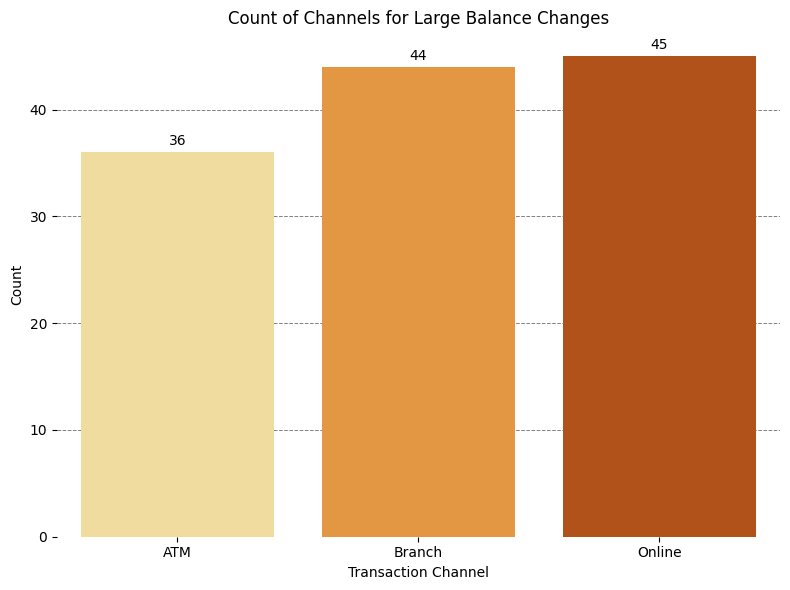

In [ ]:
channel_counts = large_balance_changes['Channel'].value_counts()
channel_percentages = large_balance_changes['Channel'].value_counts(normalize=True) * 100

custom_palette = sns.color_palette("YlOrBr", len(channel_counts.index))
fig, axes = plt.subplots(1, 1, figsize=(8, 6))

sns.countplot(x='Channel', data=large_balance_changes, ax=axes, palette=custom_palette, hue=None)

axes.set_title('Count of Channels for Large Balance Changes')
axes.set_xlabel('Transaction Channel')
axes.set_ylabel('Count')

for p in axes.patches:
    axes.annotate(f'{int(p.get_height())}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='baseline',
                  color='black', fontsize=10,
                  xytext=(0, 5),
                  textcoords='offset points')

axes.set_axisbelow(True)
axes.grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


* Diagram batang menunjukkan transaksi online memiliki jumlah yang paling tinggi dibandingkan channel lainnya terkait perubahan saldo. Transaksi online berpotensi memiliki resiko yang lebih tinggi terhadap aktifitas penipuan

# Top 10 merchant terkait dengan perubahan saldo besar

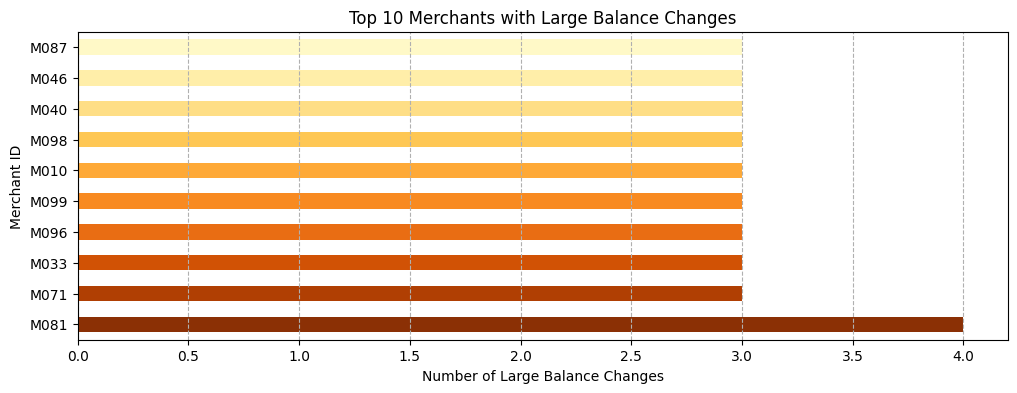

In [ ]:
merchant_counts = large_balance_changes['MerchantID'].value_counts().nlargest(10)

plt.figure(figsize=(12, 4))
merchant_counts.plot(kind='barh', color=sns.color_palette("YlOrBr_r", 10))
plt.title('Top 10 Merchants with Large Balance Changes')
plt.xlabel('Number of Large Balance Changes')
plt.ylabel('Merchant ID')
plt.grid(axis='x', linestyle='--')
plt.show()

* Pada diagram tersebut terlihat bahwa M081 signifikan memiliki jumlah perubahan saldo terbanyak

# Top 10 lokasi terkait dengan perubahan saldo besar

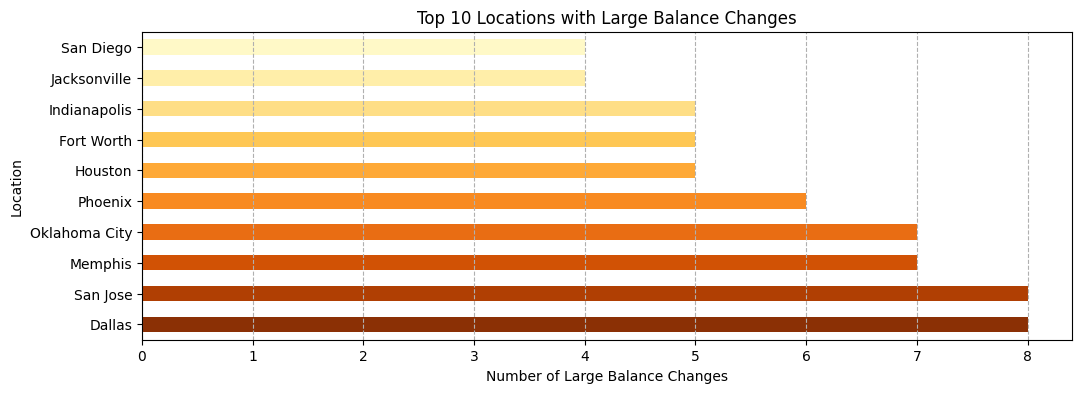

In [ ]:
location_counts = large_balance_changes['Location'].value_counts().nlargest(10)

plt.figure(figsize=(12, 4))
location_counts.plot(kind='barh', color=sns.color_palette("YlOrBr_r", 10))
plt.title('Top 10 Locations with Large Balance Changes')
plt.xlabel('Number of Large Balance Changes')
plt.ylabel('Location')
plt.grid(axis='x', linestyle='--')
plt.show()

* Dallas menjadi lokasi yang memiliki jumlah perubahan saldo besar tertinggi diantara lainnya

# Bagaimana distribusi perubahan saldonya dalam sehari (perjam)

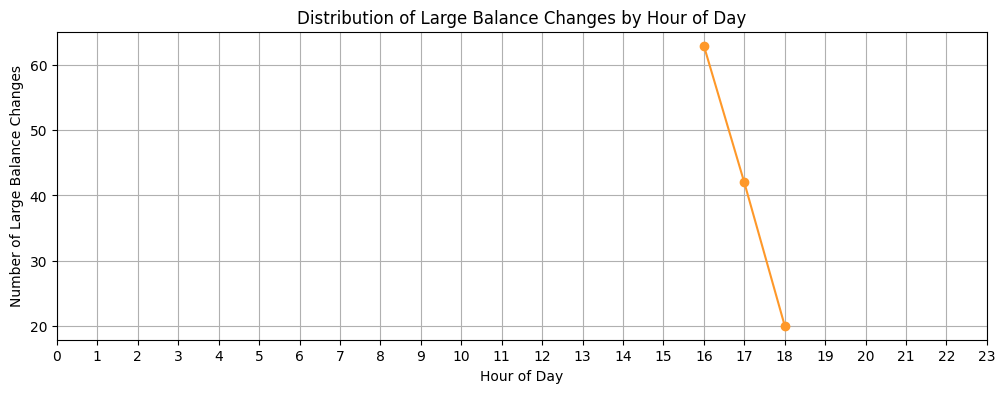

In [ ]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')

large_balance_changes['TransactionDate'] = pd.to_datetime(large_balance_changes['TransactionDate'], errors='coerce')

large_balance_changes['TransactionHour'] = large_balance_changes['TransactionDate'].dt.hour
large_balance_changes['TransactionDayOfWeek'] = large_balance_changes['TransactionDate'].dt.day_name()

hour_counts = large_balance_changes['TransactionHour'].value_counts().sort_index()

plt.figure(figsize=(12, 4))
plt.plot(hour_counts.index, hour_counts.values, color=sns.color_palette("YlOrBr", 1)[0], marker='o')
plt.title('Distribution of Large Balance Changes by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Large Balance Changes')
plt.xticks(range(24))
plt.grid(True)
plt.show()


# Bagaimana distribusi perubahan saldonya dalam seminggu (perhari)

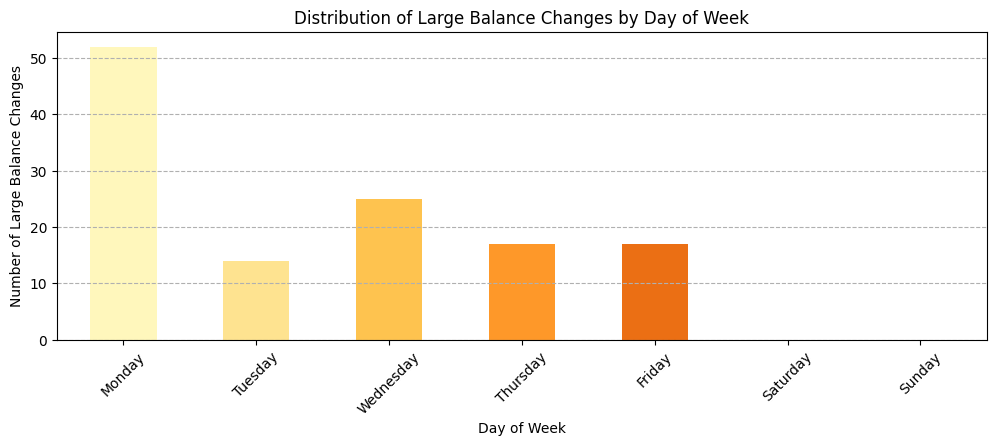

In [ ]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = large_balance_changes['TransactionDayOfWeek'].value_counts().reindex(day_order)

plt.figure(figsize=(12, 4))
day_counts.plot(kind='bar', color=sns.color_palette("YlOrBr", 7))
plt.title('Distribution of Large Balance Changes by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Large Balance Changes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

# Bagaimana tren keseluruhan jumlah transaksi harian selama periode yang ada

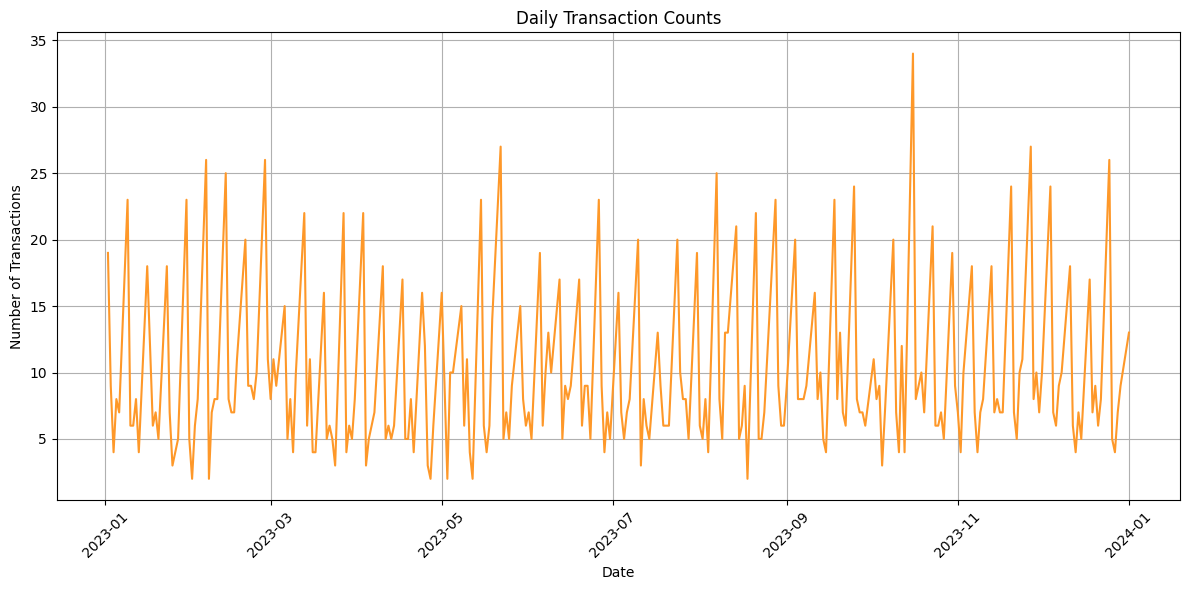

In [ ]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')

daily_transactions = df.groupby(df['TransactionDate'].dt.date).size().reset_index(name='TransactionCount')
daily_transactions['TransactionDate'] = pd.to_datetime(daily_transactions['TransactionDate'])

plt.figure(figsize=(12, 6))
sns.lineplot(x='TransactionDate', y='TransactionCount', data=daily_transactions, color=sns.color_palette("YlOrBr", 1)[0])
plt.title('Daily Transaction Counts')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Berapa banyak transaksi yang terjadi diluar jam operasional bank (diluar jam 9 pagi - 6 sore)

In [ ]:
df['TransactionHour'] = df['TransactionDate'].dt.hour

unusual_hours = list(range(0, 9)) + list(range(18, 24))

unusual_hour_transactions = df[df['TransactionHour'].isin(unusual_hours)]

print(f"Number of transactions during unusual hours: {len(unusual_hour_transactions)}")
display(unusual_hour_transactions.head())

Number of transactions during unusual hours: 377


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,996.06,18
17,TX000018,AC00359,492.93,2023-12-14 18:32:14,Debit,Columbus,D000432,114.223.129.47,M059,Online,39,Engineer,234,1,5109.97,2024-11-04 08:11:51,4617.04,18
19,TX000020,AC00285,71.48,2023-06-08 18:18:50,Credit,Columbus,D000039,120.170.93.69,M039,Online,18,Student,169,1,6568.59,2024-11-04 08:09:20,6640.07,18
21,TX000022,AC00014,85.77,2023-08-11 18:31:31,Debit,Las Vegas,D000268,59.132.247.252,M065,Branch,38,Doctor,93,1,9146.19,2024-11-04 08:08:13,9060.42,18
22,TX000023,AC00095,52.20,2023-06-06 18:54:15,Debit,Atlanta,D000142,133.63.96.21,M022,Online,39,Engineer,120,1,8974.93,2024-11-04 08:07:01,8922.73,18


# Bagaimana distribusi tipe transaksinya (debit/kredit) yang terjadi diluar jam operasional bank (diluar jam 9 pagi - 6 sore)

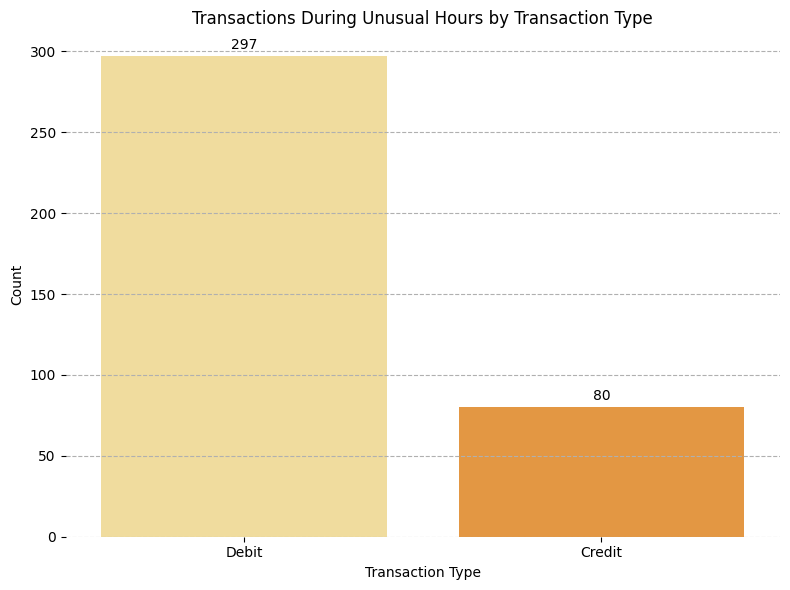

In [ ]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.countplot(data=unusual_hour_transactions, x='TransactionType', palette=custom_palette, ax=ax)

ax.set_title('Transactions During Unusual Hours by Transaction Type')
ax.set_xlabel('Transaction Type')
ax.set_ylabel('Count')
ax.grid(axis='y', linestyle='--')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                color='black', fontsize=10,
                xytext=(0, 5), textcoords='offset points')

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


# Berapa banyak transaksi yang melibatkan lebih dari satu kali login

In [ ]:
high_login_attempts = df[df['LoginAttempts'] > 1]
print(f"Number of transactions with more than one login attempt: {len(high_login_attempts)}")
display(high_login_attempts.head())

Number of transactions with more than one login attempt: 122


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour
23,TX000024,AC00453,345.84,2023-05-02 18:25:46,Debit,Fort Worth,D000162,191.82.103.198,M083,Online,22,Student,142,3,1402.50,2024-11-04 08:07:04,1056.66,18
26,TX000027,AC00441,246.93,2023-04-17 16:37:01,Debit,Miami,D000046,55.154.161.250,M029,ATM,23,Student,158,5,673.35,2024-11-04 08:11:38,426.42,16
32,TX000033,AC00060,396.45,2023-09-25 16:26:00,Debit,New York,D000621,133.67.250.163,M007,ATM,49,Engineer,168,3,9690.15,2024-11-04 08:11:13,9293.70,16
38,TX000039,AC00478,795.31,2023-10-12 17:07:40,Debit,Mesa,D000077,49.29.37.185,M048,ATM,66,Doctor,90,2,7914.88,2024-11-04 08:11:17,7119.57,17
61,TX000062,AC00002,263.99,2023-05-16 16:07:30,Debit,Dallas,D000285,7.146.35.122,M087,Branch,79,Retired,227,2,4175.02,2024-11-04 08:11:03,3911.03,16


# Deteksi fraud - K-means clustering

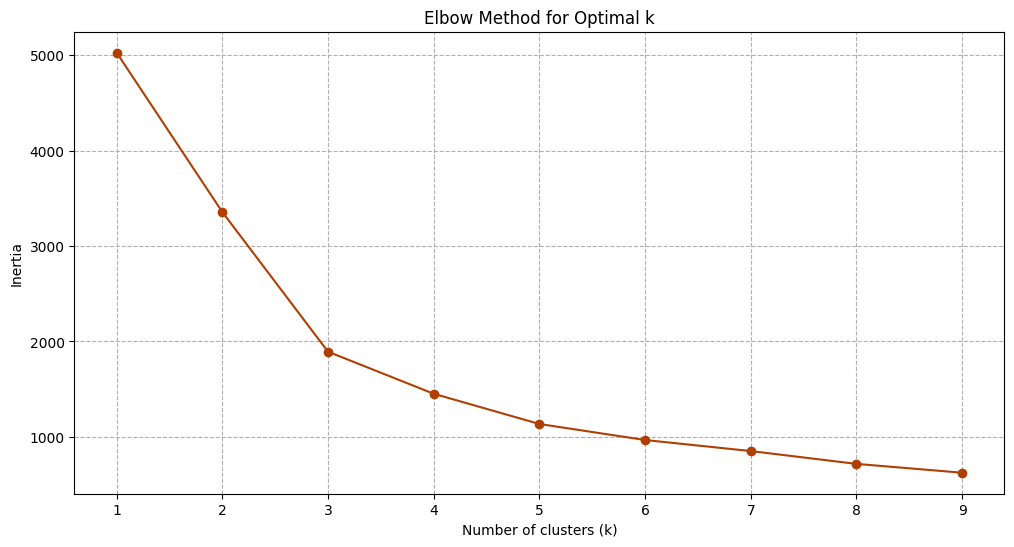

In [ ]:
# Melakukan pengecekan nilai K yang optimum menggunakan metode elbow

features = ['TransactionAmount', 'TransactionDuration']
X = df[features].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(K, inertia, marker='o', linestyle='-', color=sns.color_palette("YlOrBr", 10)[8])
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True, linestyle='--')
plt.show()

Pada plot tersebut, siku terlihat berada di sekitar k=3. Hal ini menunjukkan bahwa penggunaan 3 cluster untuk pengelompokan k-means mungkin merupakan pilihan yang baik

In [ ]:
# Melakukan perhitungan jarak data dengan titik sentroid

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

df['Cluster'] = kmeans.labels_
df['DistanceToCentroid'] = np.linalg.norm(X_scaled - kmeans.cluster_centers_[kmeans.labels_], axis=1)

threshold = df['DistanceToCentroid'].quantile(0.95)
potential_frauds = df[df['DistanceToCentroid'] > threshold]

print(f"Number of potential frauds detected: {len(potential_frauds)}")
display(potential_frauds)

Number of potential frauds detected: 126


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour,Cluster,DistanceToCentroid
74,TX000075,AC00265,1212.51,2023-10-04 16:36:29,Debit,Indianapolis,D000231,193.83.0.183,M036,Branch,20,Student,24,1,605.95,2024-11-04 08:06:51,-606.56,16,0,1.876727
85,TX000086,AC00098,1340.19,2023-09-29 17:22:10,Credit,Austin,D000574,165.114.224.47,M012,Online,54,Engineer,30,1,8654.28,2024-11-04 08:06:53,9994.47,17,0,2.163279
141,TX000142,AC00114,1049.92,2023-10-23 16:50:33,Debit,Detroit,D000522,121.67.144.20,M052,ATM,80,Retired,21,1,2037.85,2024-11-04 08:10:34,987.93,16,0,1.562140
142,TX000143,AC00163,227.14,2023-07-03 17:42:08,Debit,Charlotte,D000439,197.162.55.147,M057,ATM,18,Student,294,1,341.94,2024-11-04 08:11:34,114.80,17,2,1.521390
146,TX000147,AC00385,973.39,2023-08-30 17:23:20,Debit,Sacramento,D000292,202.194.199.70,M026,Branch,77,Retired,296,1,2042.22,2024-11-04 08:11:44,1068.83,17,0,2.640557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403,TX002404,AC00111,1493.00,2023-06-07 17:05:41,Debit,Colorado Springs,D000344,136.162.111.135,M096,ATM,69,Retired,151,1,1619.16,2024-11-04 08:07:07,126.16,17,0,2.368753
2414,TX002415,AC00028,1664.33,2023-09-25 17:11:19,Debit,San Antonio,D000072,116.106.207.139,M064,Branch,18,Student,65,1,1588.31,2024-11-04 08:07:07,-76.02,17,0,2.986511
2439,TX002440,AC00439,538.17,2023-09-26 17:27:17,Credit,Washington,D000430,116.44.12.250,M055,Branch,27,Engineer,252,1,5908.04,2024-11-04 08:10:25,6446.21,17,2,1.490003
2445,TX002446,AC00439,403.01,2023-09-04 17:32:35,Debit,Washington,D000677,223.32.70.156,M029,Online,63,Doctor,286,3,10513.52,2024-11-04 08:09:32,10110.51,17,2,1.573122


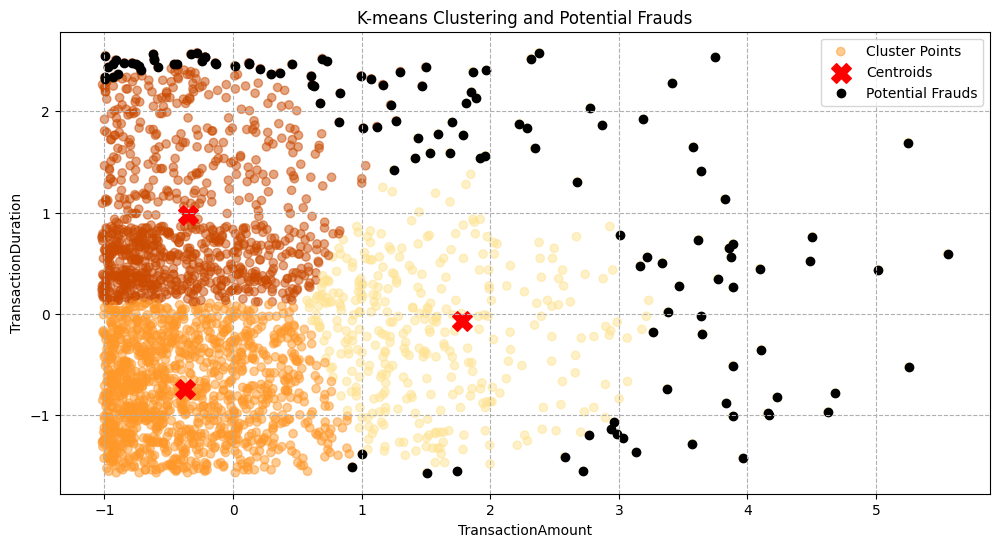

In [ ]:
# Melakukan plot data hasil clustering

plt.figure(figsize=(12, 6))

cluster_colors = sns.color_palette("YlOrBr", n_colors=len(np.unique(kmeans.labels_)))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=[cluster_colors[i] for i in kmeans.labels_], alpha=0.5, label='Cluster Points')
centroids = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')

frauds = plt.scatter(X_scaled[potential_frauds.index, 0], X_scaled[potential_frauds.index, 1], c='black', label='Potential Frauds', edgecolors='k')

plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('K-means Clustering and Potential Frauds')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--')
plt.show()

Plot menunjukkan 3 cluster yang berbeda, cluster-cluster tersebut tampak terpisah dengan baik. Titik-titik hitam yang terlihat terindikasi sebagai potensi penipuan.Dari data ada 126 transaksi yang berpotensi penipuan berdasarkan ambang batas jarak

* Cluster kuning : cluster ini berisi sebagian besar transaksi dan mewakili transaksi normal pada umumnya

* Cluster oren : Cluster ini mewakili transaksi dengan jumlah dan durasi sedang

* Cluster coklat : Cluster ini mewakili transaksi dengan jumlah yang lebih besar dan durasi yang lebih lama



# Deteksi fraud - DBSCAN clustering

In [ ]:
label_mapping = {
    -1: 'Fraud (Outliers)',
    0: 'Normal',
    1: 'Suspicious Group 1',
    2: 'Suspicious Group 2',
    3: 'Suspicious Group 3',
    4: 'Suspicious Group 4',
}

features = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'LoginAttempts']
X = df[features].copy()

X = X.fillna(X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan.fit(X_scaled)

df['DBSCAN_Cluster'] = dbscan.labels_

df['Cluster_Description'] = df['DBSCAN_Cluster'].map(label_mapping)

potential_frauds = df[df['DBSCAN_Cluster'] == -1]
print(f"Number of potential frauds detected by DBSCAN: {len(potential_frauds)}")
display(potential_frauds.head())

Number of potential frauds detected by DBSCAN: 17


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour,Cluster,DistanceToCentroid,DBSCAN_Cluster,Cluster_Description
274,TX000275,AC00454,1176.28,2023-12-20 16:08:02,Credit,Kansas City,D000476,50.202.8.53,M074,ATM,...,174,5,323.69,2024-11-04 08:11:44,1499.97,16,0,1.488559,-1,Fraud (Outliers)
454,TX000455,AC00264,611.11,2023-10-18 18:32:31,Debit,Detroit,D000215,141.201.46.191,M045,ATM,...,282,4,919.84,2024-11-04 08:11:12,308.73,18,2,1.959599,-1,Fraud (Outliers)
653,TX000654,AC00423,1919.11,2023-06-27 17:48:25,Debit,Portland,D000191,207.157.126.125,M033,ATM,...,161,1,11090.24,2024-11-04 08:10:27,9171.13,17,0,3.828962,-1,Fraud (Outliers)
693,TX000694,AC00011,733.29,2023-03-15 18:42:16,Debit,Virginia Beach,D000618,16.51.235.240,M032,ATM,...,94,5,10427.00,2024-11-04 08:07:12,9693.71,18,0,0.418493,-1,Fraud (Outliers)
754,TX000755,AC00153,84.34,2023-06-08 16:27:56,Debit,Memphis,D000493,200.136.146.93,M039,Online,...,248,3,5313.97,2024-11-04 08:09:31,5229.63,16,2,0.940290,-1,Fraud (Outliers)


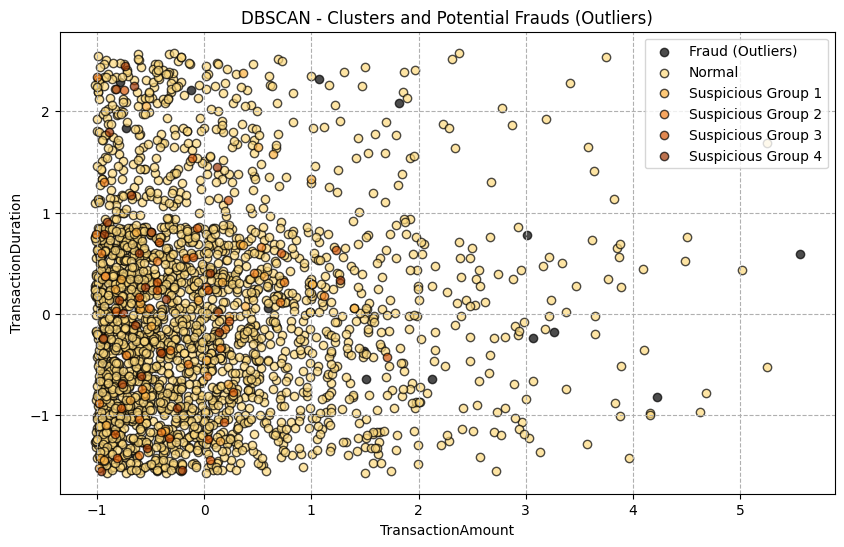

In [ ]:
plt.figure(figsize=(10, 6))
unique_labels = np.unique(dbscan.labels_)

cluster_colors = sns.color_palette("YlOrBr", n_colors=len(unique_labels))

colors = []
for i, k in enumerate(unique_labels):
    if k == -1:
        colors.append([0, 0, 0, 1])
    else:
        colors.append(cluster_colors[i % len(cluster_colors)])

for k, col in zip(unique_labels, colors):
    class_member_mask = (dbscan.labels_ == k)
    xy = X_scaled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], color=col, edgecolor='k', alpha=0.7, label=label_mapping.get(k, f'Cluster {k}'))

plt.title('DBSCAN - Clusters and Potential Frauds (Outliers)')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

Plot menunjukkan beberapa kelompok transaksi yang berbeda, yang menunjukkan bahwa DBSCAN secara efektif mengelompokkan transaksi serupa bersama. Titik-titik hitam mewakili transaksi yang terindikasi sebagai potensi penipuan. terindikasi terdapat 17 transaksi yang berpotensi penipuan berdassarkan outlier.

DBSCAN juga mengidentifikasi beberapa kelompok mencurigakan. Kelompok-kelompok ini mewakili transaksi dengan karakter tertentu yang perlu penyelidikan lebih lanjut meskipun tidak dianggap sebagai outlier